#### Train models using LR, KNN, and SVC algorithms both with default and optimal hyperparameters and compare your results using the model performance summary template.

In [1]:
import numpy as np #  used for working with arrays
import pandas as pd # a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns # a Python data visualization library based on matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics

In [2]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
scipy: 1.5.2
numpy: 1.19.2
matplotlib: 3.3.2
pandas: 1.1.3
sklearn: 0.23.2


In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")

In [4]:
df.dtypes

1000025     int64
5           int64
1           int64
1.1         int64
1.2         int64
2           int64
1.3        object
3           int64
1.4         int64
1.5         int64
2.1         int64
dtype: object

In [5]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", names=["idNumber", "clumpThickness", "uniformityOfCellSize", "UniformityofCellShape", "MarginalAdhesion", "SingleEpithelialCellSize","BareNuclei","BlandChromatin","NormalNucleoli", "Mitoses", "Class"])

In [6]:
df.head(50)

,idNumber,clumpThickness,uniformityOfCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idNumber                  699 non-null    int64 
 1   clumpThickness            699 non-null    int64 
 2   uniformityOfCellSize      699 non-null    int64 
 3   UniformityofCellShape     699 non-null    int64 
 4   MarginalAdhesion          699 non-null    int64 
 5   SingleEpithelialCellSize  699 non-null    int64 
 6   BareNuclei                699 non-null    object
 7   BlandChromatin            699 non-null    int64 
 8   NormalNucleoli            699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## Data Cleaning

In [8]:
df.columns

Index(['idNumber', 'clumpThickness', 'uniformityOfCellSize',
       'UniformityofCellShape', 'MarginalAdhesion', 'SingleEpithelialCellSize',
       'BareNuclei', 'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [9]:
df["BareNuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

It was found that BareNuclei is identified as object. This could be due to the '?' it found in the column. We will assume that it signifies a missing value

In [10]:
df.duplicated().sum()
duplicates = df.duplicated()
df[duplicates]
df.drop_duplicates(inplace=True)

In [11]:
columns = df.drop(columns = "idNumber", axis = 0, inplace = True)
columns

In [12]:
df

,clumpThickness,uniformityOfCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [13]:
#to identify any missing values
df = df[df.iloc[:] != '?']
df.dropna(subset = df.columns, inplace=True)
df.isnull().sum().sort_values(ascending=False)

Class                       0
Mitoses                     0
NormalNucleoli              0
BlandChromatin              0
BareNuclei                  0
SingleEpithelialCellSize    0
MarginalAdhesion            0
UniformityofCellShape       0
uniformityOfCellSize        0
clumpThickness              0
dtype: int64

In [14]:
#to replace class values 2 and 4 into 0 and 1 respectively
df.replace({'Class':{2:0, 4:1}}, inplace=True)

In [15]:
df.shape

(675, 10)

In [16]:
#to convert the data type of BareNuclei from object to int64
df["BareNuclei"] = df["BareNuclei"].astype(str).astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   clumpThickness            675 non-null    int64
 1   uniformityOfCellSize      675 non-null    int64
 2   UniformityofCellShape     675 non-null    int64
 3   MarginalAdhesion          675 non-null    int64
 4   SingleEpithelialCellSize  675 non-null    int64
 5   BareNuclei                675 non-null    int64
 6   BlandChromatin            675 non-null    int64
 7   NormalNucleoli            675 non-null    int64
 8   Mitoses                   675 non-null    int64
 9   Class                     675 non-null    int64
dtypes: int64(10)
memory usage: 58.0 KB


## Checking for outliers

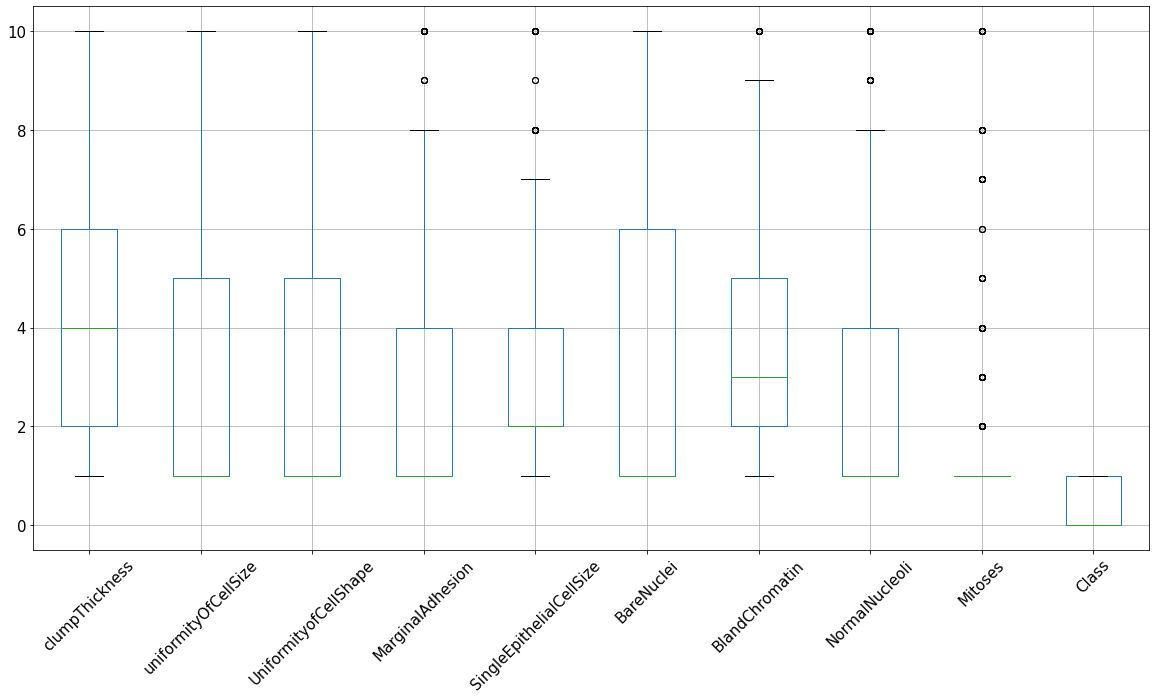

In [18]:
df.boxplot(column = columns, rot=45, fontsize = 15, grid = True, figsize = (20,10));

In [19]:
df_outliers = pd.DataFrame(df.loc[:,])

# Calculate IQR
Q1 = df_outliers.quantile(0.25)
Q3 = df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

clumpThickness              4.0
uniformityOfCellSize        4.0
UniformityofCellShape       4.0
MarginalAdhesion            3.0
SingleEpithelialCellSize    2.0
BareNuclei                  5.0
BlandChromatin              3.0
NormalNucleoli              3.0
Mitoses                     0.0
Class                       1.0
dtype: float64


In [20]:
for i, j in zip(np.where(df_outliers > Q3 + 1.5 * IQR)[0], np.where(df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df_outliers.iloc[i,j] = whisker[j]
    
# Replace every outlier on the lower side by the lower whisker - for 'water' column
for i, j in zip(np.where(df_outliers < Q1 - 1.5 * IQR)[0], np.where(df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df_outliers.iloc[i,j] = whisker[j]

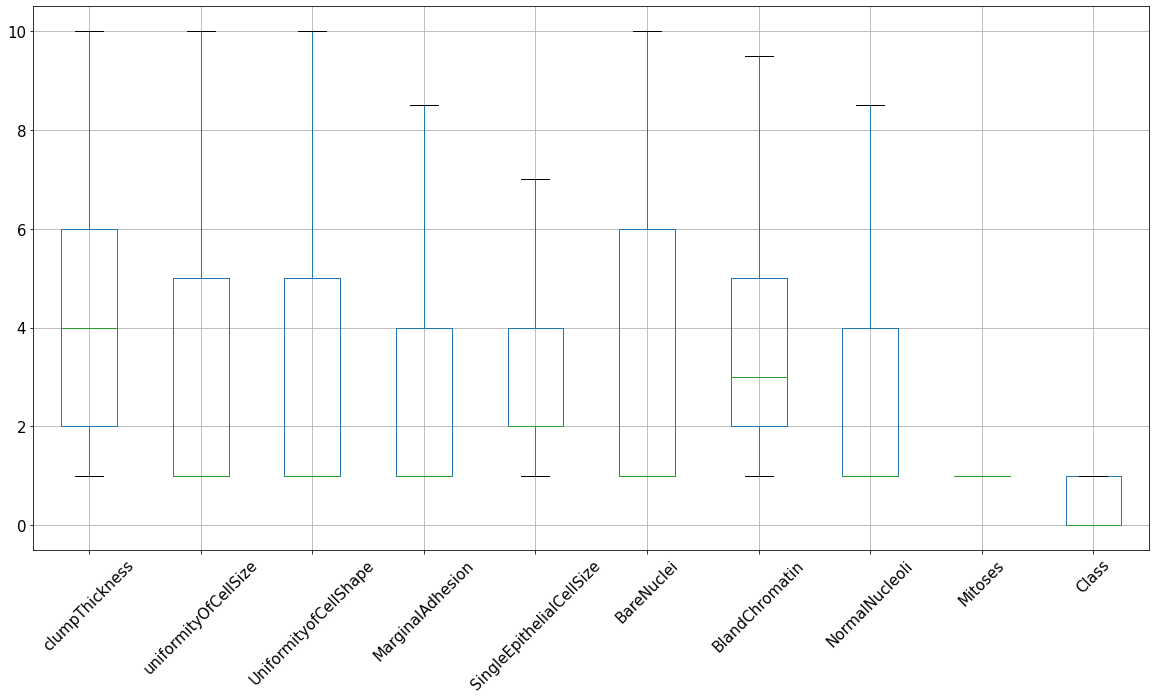

In [21]:
df.boxplot(column = columns, rot=45, fontsize = 15, grid = True, figsize = (20,10));

## Exploratory Data Analysis

In [22]:
df_copy = df.copy()

In [23]:
df_copy

,clumpThickness,uniformityOfCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1.0,2.0,1,3.0,1.0,1.0,0
1,5,4,4,5.0,7.0,10,3.0,2.0,1.0,0
2,3,1,1,1.0,2.0,2,3.0,1.0,1.0,0
3,6,8,8,1.0,3.0,4,3.0,7.0,1.0,0
4,4,1,1,3.0,2.0,1,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1.0,3.0,2,1.0,1.0,1.0,0
695,2,1,1,1.0,2.0,1,1.0,1.0,1.0,0
696,5,10,10,3.0,7.0,3,8.0,8.5,1.0,1
697,4,8,6,4.0,3.0,4,9.5,6.0,1.0,1


In [24]:
df_copy.isnull().sum().sort_values(ascending=False)

Class                       0
Mitoses                     0
NormalNucleoli              0
BlandChromatin              0
BareNuclei                  0
SingleEpithelialCellSize    0
MarginalAdhesion            0
UniformityofCellShape       0
uniformityOfCellSize        0
clumpThickness              0
dtype: int64

In [25]:
# to get the column names of the datset
columns = df_copy.columns
columns

Index(['clumpThickness', 'uniformityOfCellSize', 'UniformityofCellShape',
       'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [26]:
# to convert arrays to list
columns = columns.tolist()

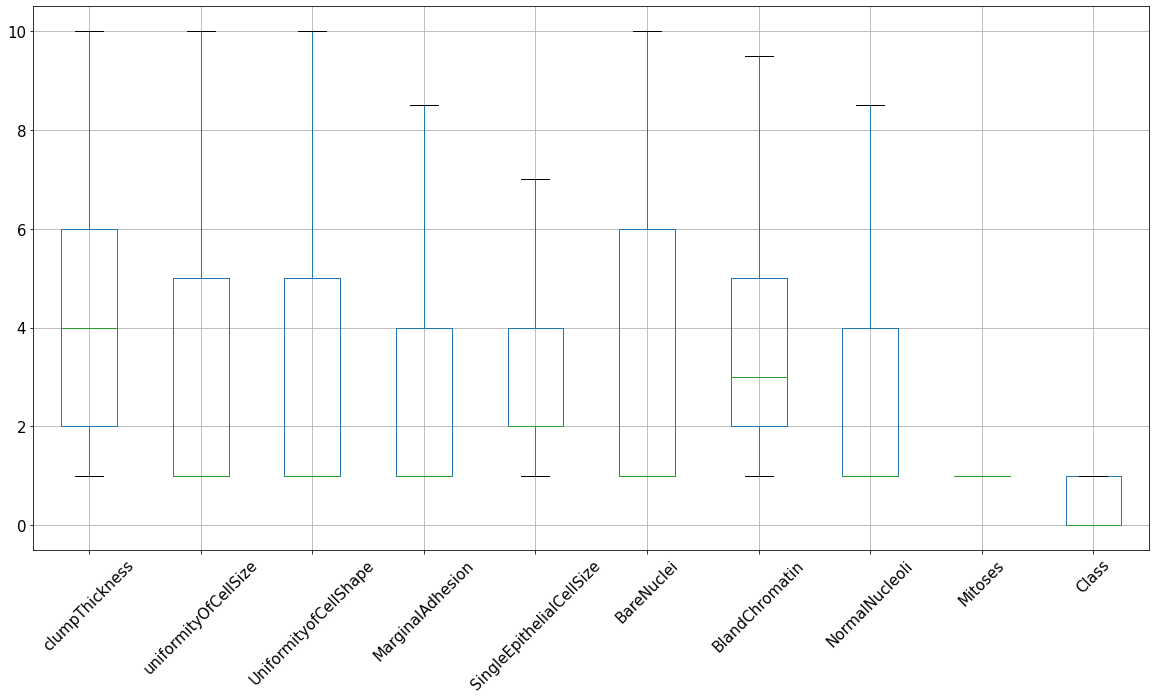

In [27]:
# to show the boxplot
df_copy.boxplot(column = columns, rot=45, fontsize = 15, grid = True, figsize = (20,10));

In [28]:
# to get the column names of the datset
cols = df_copy.columns
cols

Index(['clumpThickness', 'uniformityOfCellSize', 'UniformityofCellShape',
       'MarginalAdhesion', 'SingleEpithelialCellSize', 'BareNuclei',
       'BlandChromatin', 'NormalNucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [29]:
# to convert arrays to list
cols = cols.tolist()

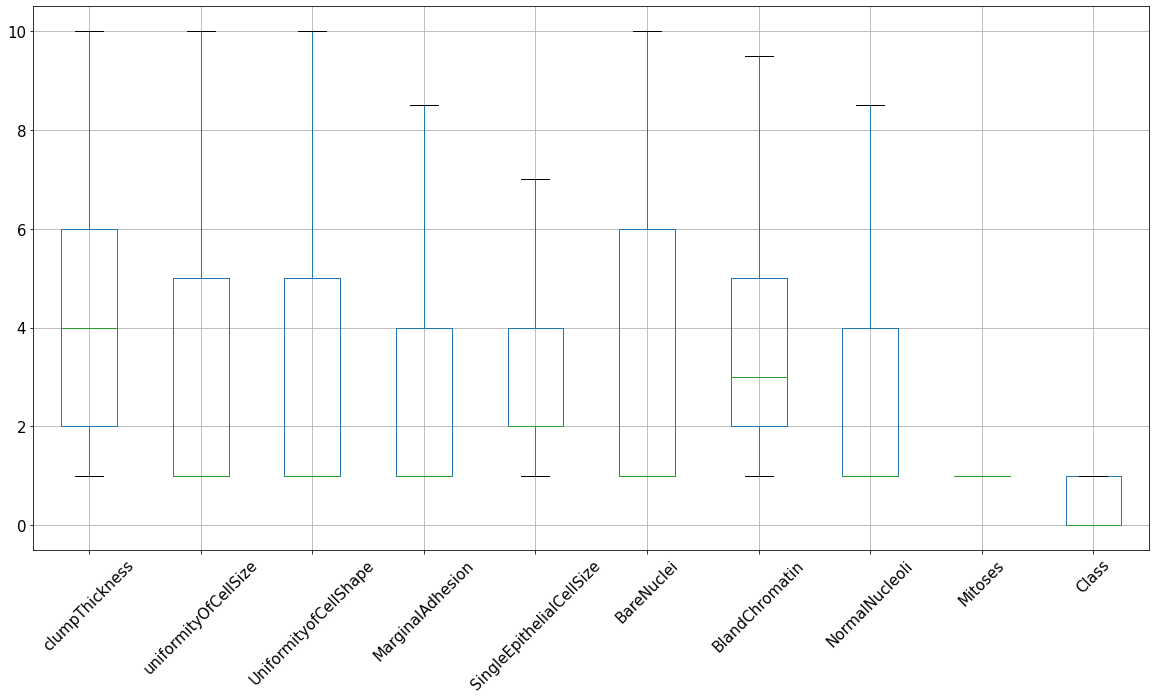

In [30]:
# to show the boxplot
df_copy.boxplot(column = cols, rot=45, fontsize = 15, grid = True, figsize = (20,10));

<AxesSubplot:>

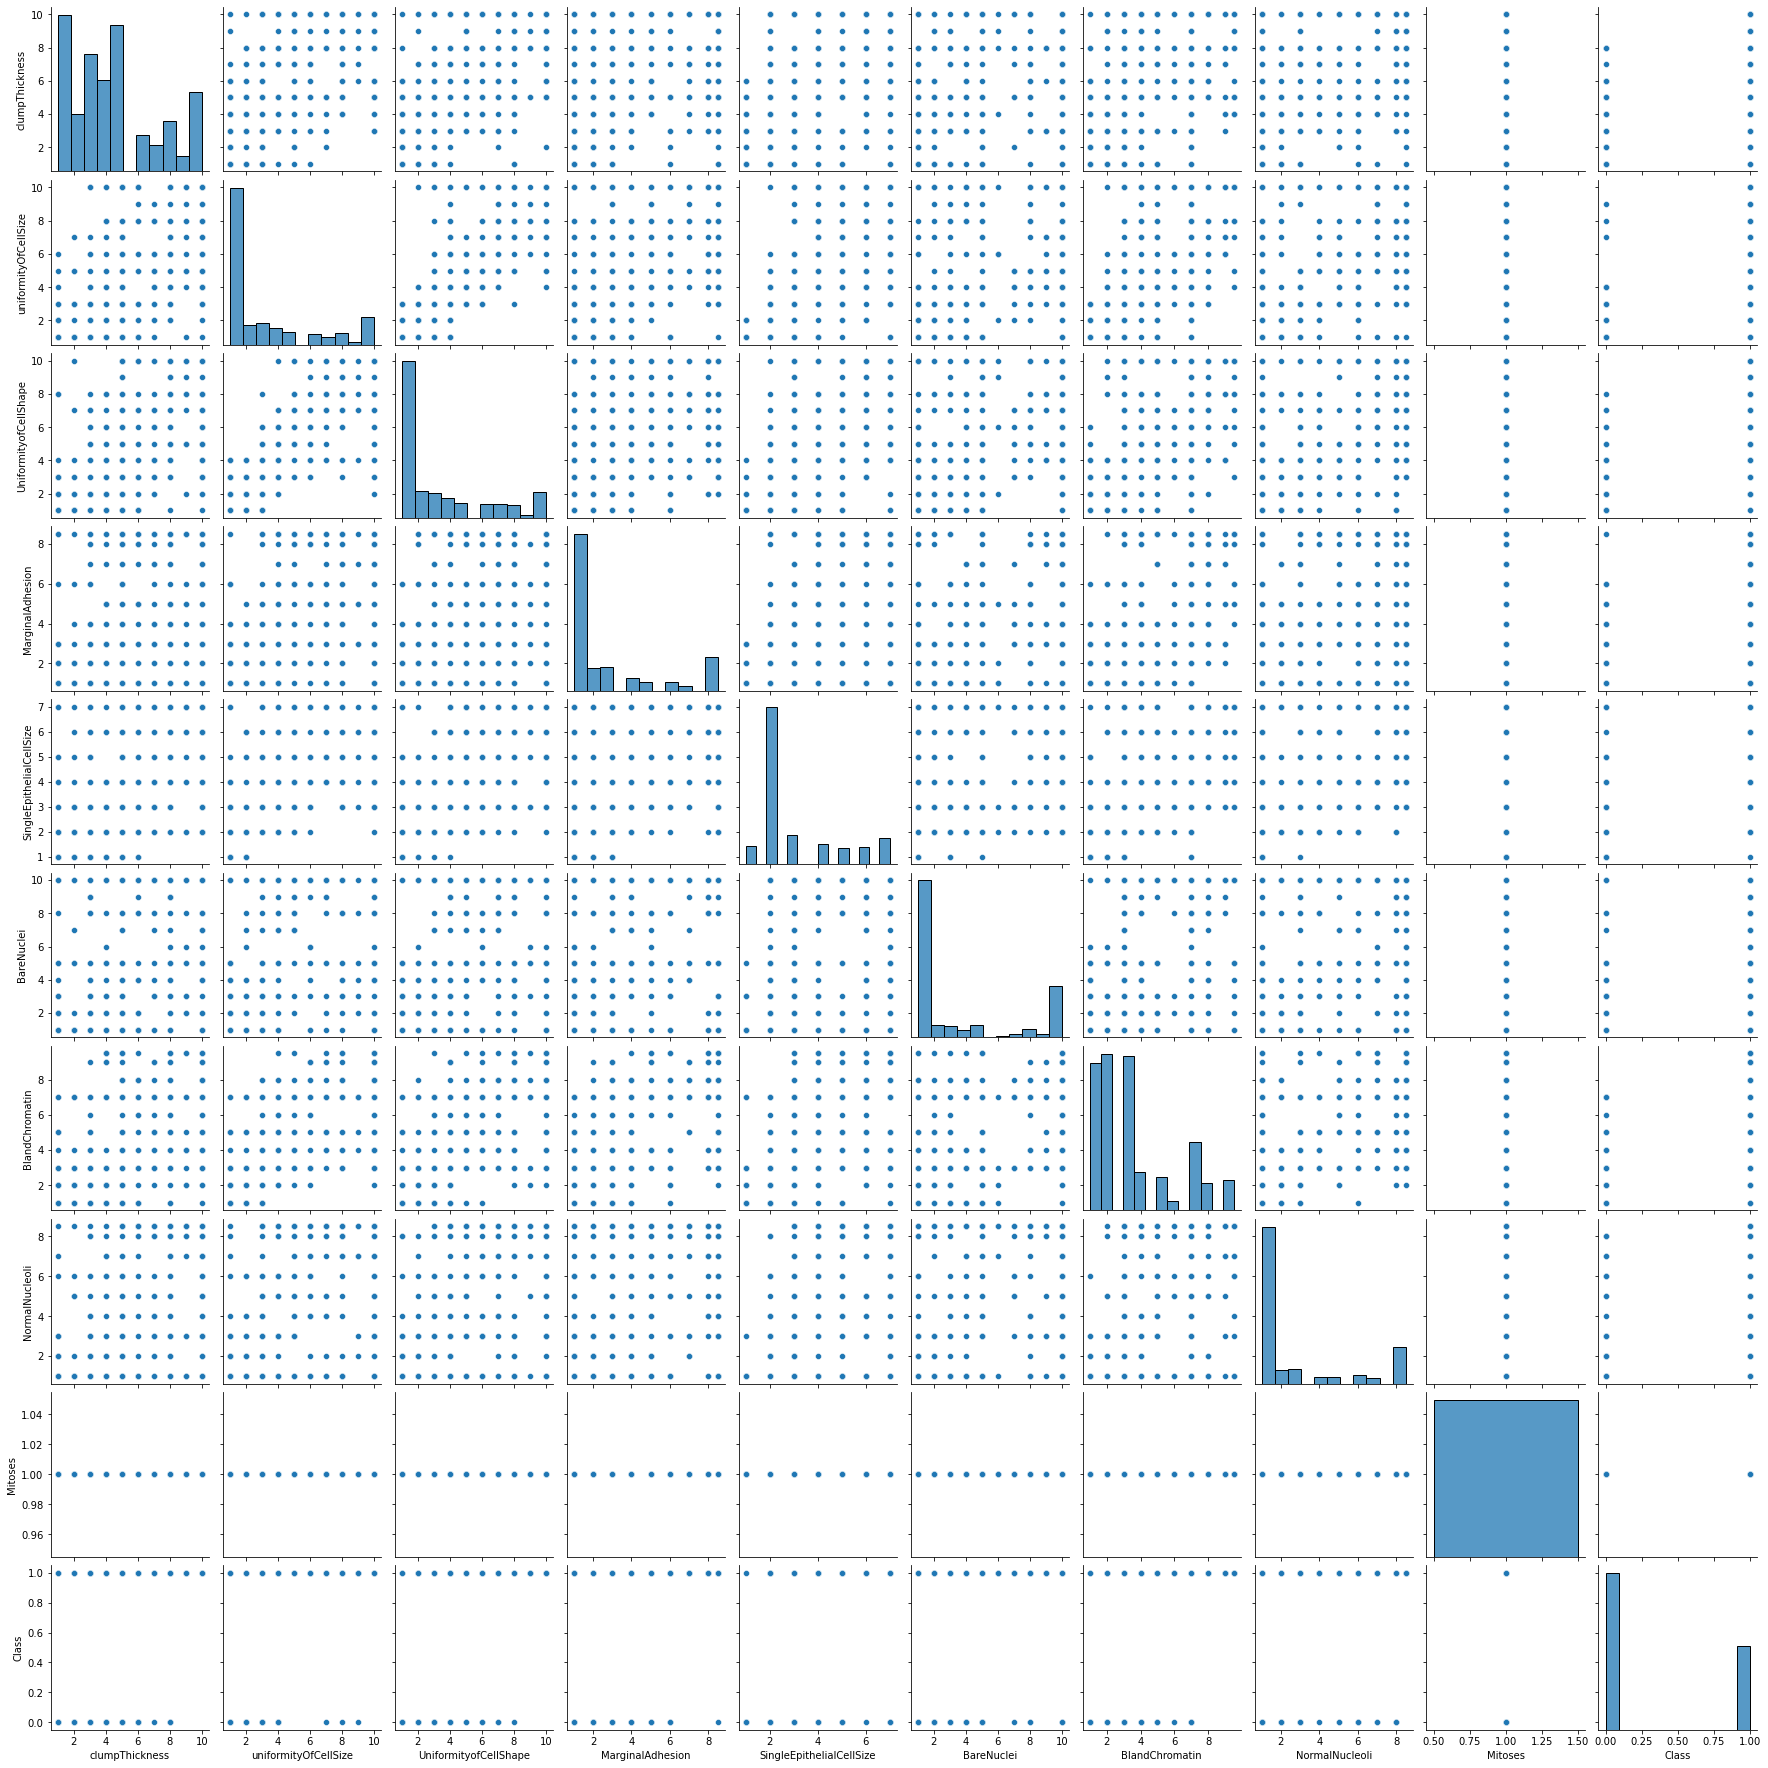

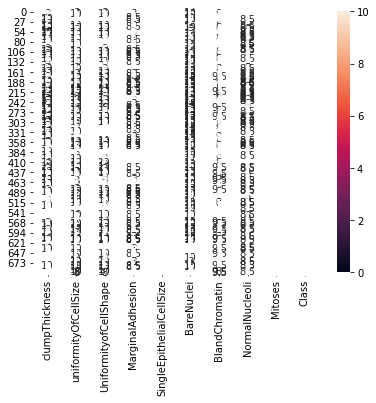

In [31]:
# To view the scatterplot of our dataset
sns.pairplot(df_copy)

# To determine the Pearson's Coefficient of Correlation for the whole dataset
dataset_correlation = df_copy.corr()
plt.figure(figsize= (6.4, 4.8))
sns.heatmap(df_copy, annot=True, linewidths=3)


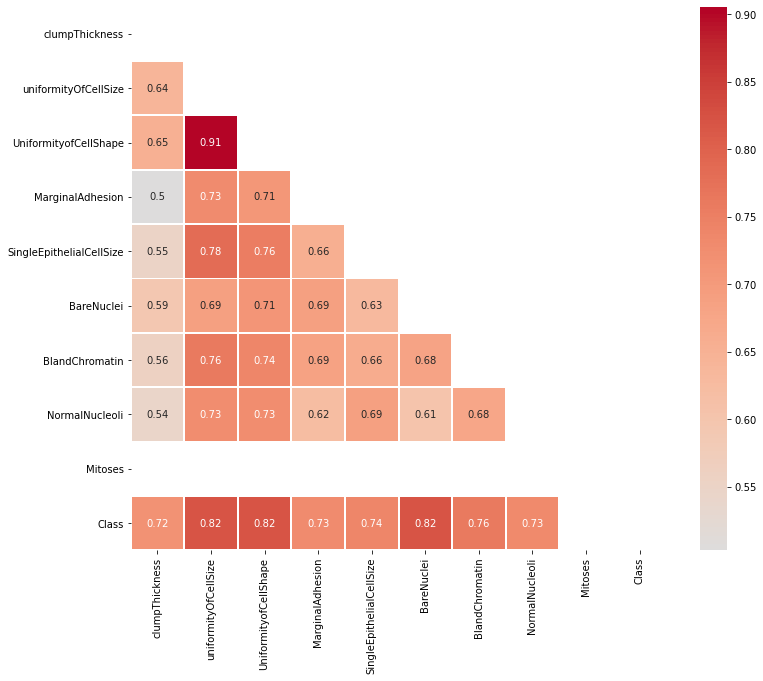

In [32]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

In [33]:
df["Class"] = df["Class"].astype("category") 

In [34]:
# To create the matrix of independent variable, x
X = df_copy.iloc[:,0:9].values
# To create the matrix of dependent variable, y
Y = df_copy.iloc[:,9].values

In [35]:
X

array([[ 5. ,  1. ,  1. , ...,  3. ,  1. ,  1. ],
       [ 5. ,  4. ,  4. , ...,  3. ,  2. ,  1. ],
       [ 3. ,  1. ,  1. , ...,  3. ,  1. ,  1. ],
       ...,
       [ 5. , 10. , 10. , ...,  8. ,  8.5,  1. ],
       [ 4. ,  8. ,  6. , ...,  9.5,  6. ,  1. ],
       [ 4. ,  8. ,  8. , ...,  9.5,  4. ,  1. ]])

In [36]:
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

In [37]:
# To encode the categorical data
from sklearn.preprocessing import LabelEncoder

# A. To encode the categorical data (State) in the independent variable, X
label_encoder_X = LabelEncoder()
X[:,0] = label_encoder_X.fit_transform(X[:,0])

In [38]:
# To split the whole dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #train_size=0.8, you can either still put this or not since test_size is already defined. By default, remaining is for training

In [39]:
# To perform feature scaling 
# For standardization feature scaling
from sklearn.preprocessing import StandardScaler # for not normally distributed samples
standard_scaler = StandardScaler ()
X_train_standard = X_train.copy()
X_test_standard = X_test.copy()
X_train_standard = standard_scaler.fit_transform(X_train_standard)
X_test_standard = standard_scaler.fit_transform(X_test_standard) 

In [40]:
X_train_standard

array([[ 0.19725746,  2.18186278,  2.24699302, ...,  2.51019556,
         2.0059428 ,  0.        ],
       [-1.22299626, -0.71853468, -0.7588936 , ..., -1.03007103,
        -0.6607463 ,  0.        ],
       [ 1.26244775, -0.39626829, -0.09091879, ...,  1.46894068,
        -0.6607463 ,  0.        ],
       ...,
       [-1.22299626, -0.71853468, -0.7588936 , ..., -1.03007103,
        -0.6607463 ,  0.        ],
       [ 0.19725746, -0.71853468, -0.7588936 , ..., -0.61356908,
        -0.30518775,  0.        ],
       [ 0.19725746,  1.21506363,  2.24699302, ...,  1.46894068,
         0.76148789,  0.        ]])

In [41]:
Y_train

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

#### To import the necessary machine learning models

In [42]:
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier

In [43]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())]

##### To Build Different Machine Learning Models

In [44]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
	k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
	cv_results = cross_val_score(model, X, Y, cv=k_Fold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	printed_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(printed_results)

LR: 0.968898 (0.026139)
KNN: 0.968898 (0.026065)
SVM: 0.967450 (0.024607)


#### To Select the Best Machine Learning Model

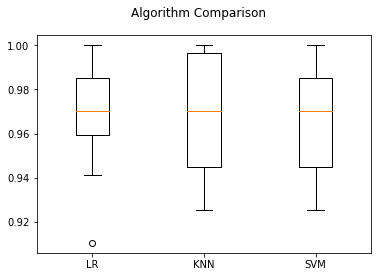

In [45]:
figure = plt.figure()
figure.suptitle('Algorithm Comparison')
axis = figure.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

## A. Logistic Regression

In [46]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

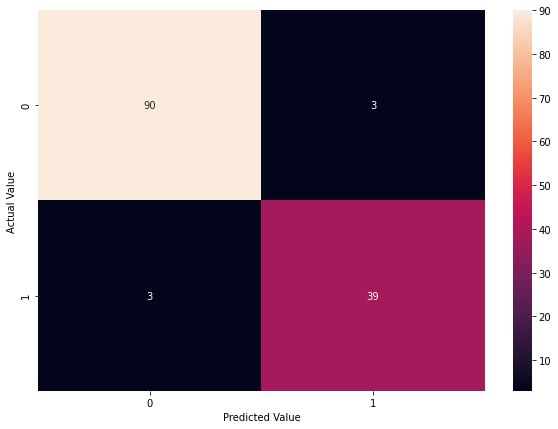

In [47]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [48]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9556



In [49]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        93
           1       0.93      0.93      0.93        42

    accuracy                           0.96       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.96      0.96      0.96       135



In [50]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

### Cross Validation for Logistic Regression (Default)

In [51]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.97058824 0.95588235 0.92647059 0.91176471 0.98529412 1.
 0.97014925 0.98507463 0.98507463 0.98507463]
 
Average Accuracy of K-FOLDS:
0.9675373134328359
 
Accuracy Variance of K-FOLDS:
0.026908791006294015
 


In [52]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.97058824 0.95588235 0.92647059 0.91176471 0.98529412 1.
 0.97014925 0.98507463 0.98507463 0.98507463]
 
Average F1 of K-FOLDS:
0.9675373134328359
 
F1 Variance of K-FOLDS:
0.026908791006294015
 


### Hold-out Validation for Logistic Regression (Default)

In [53]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_LogReg)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_LogReg)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_LogReg)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9556
 
Classification Error: 0.0444
 
Sensitivity or Recall Score: 0.9286
 
Specificity: 0.9677
 
False Positive Rate: 0.0323
 
Precision: 0.9286
 
F1 Score: 0.9286
 


#### Applying GridSearchCV to find the Best Parameters for the Logistic Regression Model

In [54]:
# To Import the StartifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear','saga']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['none', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}]

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=LogisticRegression(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['none', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}],
             scoring='accuracy')


In [55]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.650395,0.005381,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
1,0.650395,0.005381,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}"
2,0.952612,0.036599,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin..."
3,0.954061,0.034838,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}"
4,0.962972,0.026830,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
...,...,...,...
65,0.968898,0.026139,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'}"
66,0.968898,0.026139,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton..."
67,0.968898,0.026139,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}"
68,0.967428,0.027221,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}"


In [56]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9703687445127305

BEST PARAMETERS:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


#### Applying RandomizedSearchCV to find the Best Parameters for the Logistic Regression Model

In [57]:
# To Import the StratifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import RandomizedSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['none', 'l2'] # should also include l1 but it is necognized for the solver newton-cg.
solver = ['newton-cg', 'lbfgs', 'saga', 'sag']
parameters = dict(C=C, penalty=penalty, solver=solver)

randomized_search = RandomizedSearchCV(estimator = logistic_regression,
                                       param_distributions = parameters,
                                       n_iter = 100,
                                       scoring = 'accuracy',
                                       cv = k_Fold,
                                       n_jobs = -1,
                                       random_state = 0)
best_fit = randomized_search.fit(X, Y)
print(randomized_search)

C:\Users\beame\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 56 is smaller than n_iter=100. Running 56 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=LogisticRegression(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['none', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs', 'saga',
                                                   'sag']},
                   random_state=0, scoring='accuracy')


C:\Users\beame\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [58]:
# To View the Results of the GridSearch
pd.DataFrame(randomized_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.968898,0.026139,"{'solver': 'newton-cg', 'penalty': 'none', 'C'..."
1,0.968898,0.026139,"{'solver': 'lbfgs', 'penalty': 'none', 'C': 0...."
2,0.967428,0.027221,"{'solver': 'saga', 'penalty': 'none', 'C': 0.001}"
3,0.968898,0.026139,"{'solver': 'sag', 'penalty': 'none', 'C': 0.001}"
4,0.957024,0.027009,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': ..."
5,0.957024,0.027009,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.001}"
6,0.957024,0.027009,"{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}"
7,0.957024,0.027009,"{'solver': 'sag', 'penalty': 'l2', 'C': 0.001}"
8,0.968898,0.026139,"{'solver': 'newton-cg', 'penalty': 'none', 'C'..."
9,0.968898,0.026139,"{'solver': 'lbfgs', 'penalty': 'none', 'C': 0.01}"


In [59]:
# To Identify the Best Accuracy and Best Features

best_accuracy = randomized_search.best_score_
best_parameters = randomized_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9688981562774363

BEST PARAMETERS:
{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.001}


###### To Create New Logistic Regression Model Using the Optimal Parametersrameters

In [60]:
# To Instantiate the Model (Using the Optimized Parameters)
logistic_regression = LogisticRegression(C=0.001, penalty='none', solver='newton-cg', random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

C:\Users\beame\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

###### To Evaluate the Performance of the Logistic Regression Model

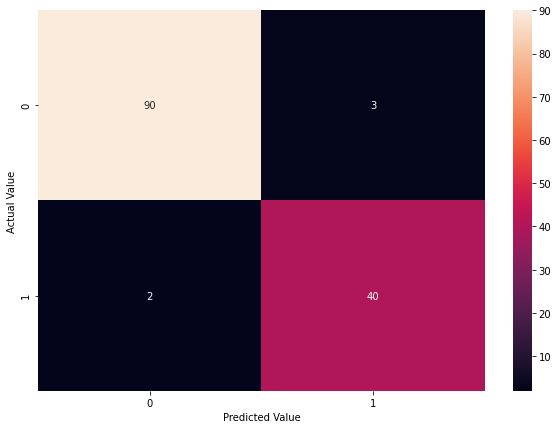

In [61]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [62]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9630



In [63]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        93
           1       0.93      0.95      0.94        42

    accuracy                           0.96       135
   macro avg       0.95      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135



In [64]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [65]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.97058824 0.95588235 0.92647059 0.91176471 0.98529412 1.
 0.97014925 0.98507463 0.98507463 0.98507463]
 
Average Accuracy of K-FOLDS:
0.9675373134328359
 
Accuracy Variance of K-FOLDS:
0.026908791006294015
 


In [66]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.97058824 0.95588235 0.92647059 0.91176471 0.98529412 1.
 0.97014925 0.98507463 0.98507463 0.98507463]
 
Average F1 of K-FOLDS:
0.9675373134328359
 
F1 Variance of K-FOLDS:
0.026908791006294015
 


In [67]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_LogReg)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_LogReg)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_LogReg)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9630
 
Classification Error: 0.0370
 
Sensitivity or Recall Score: 0.9524
 
Specificity: 0.9677
 
False Positive Rate: 0.0323
 
Precision: 0.9302
 
F1 Score: 0.9412
 


## B. KNN model

In [68]:
# To fit the training dataset into a KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='brute',n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)
model.fit(X_train_standard, Y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1)

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model

In [69]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto', leaf_size=10)

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

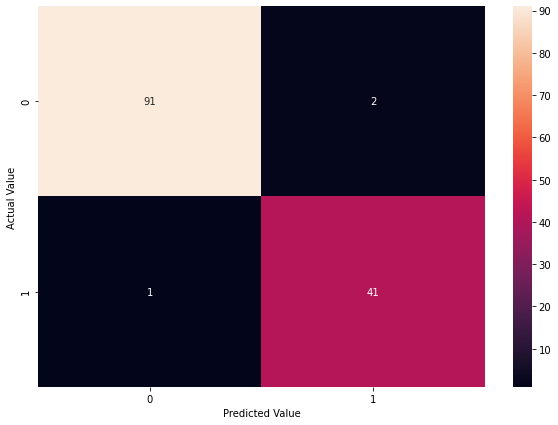

In [70]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [71]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9778



In [72]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.95      0.98      0.96        42

    accuracy                           0.98       135
   macro avg       0.97      0.98      0.97       135
weighted avg       0.98      0.98      0.98       135



### Cross Validation for KNN (Default)

In [73]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [74]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average Accuracy of K-FOLDS:
0.9689420544337137
 
Accuracy Variance of K-FOLDS:
0.023223379758989998
 


In [75]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average F1 of K-FOLDS:
0.9689420544337137
 
F1 Variance of K-FOLDS:
0.023223379758989998
 


In [76]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_KNN)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_KNN)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_KNN)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9778
 
Classification Error: 0.0222
 
Sensitivity or Recall Score: 0.9762
 
Specificity: 0.9785
 
False Positive Rate: 0.0215
 
Precision: 0.9535
 
F1 Score: 0.9647
 


#### Applying GridSearch to find the Best Parameters for the K-Nearest Neighbors Machine Model


In [78]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the K Nearest Neighbors Model
k_range = list(range(1, 51))
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 20, 30, 40, 50, 60, 70, 80, 100]
parameters = dict(n_neighbors=k_range, weights=weight, algorithm=algorithm, leaf_size=leaf_size)
grid_search = GridSearchCV(estimator = k_nearest_neighbors,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(leaf_size=10, n_neighbors=4,
                                            weights='distance'),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')


In [79]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.955531,0.030462,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
1,0.955531,0.030462,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
2,0.942230,0.030769,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
3,0.955531,0.030462,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
4,0.967406,0.028798,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
...,...,...,...
3595,0.960009,0.025793,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3596,0.960009,0.025793,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3597,0.960009,0.025793,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3598,0.960009,0.025793,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."


In [80]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9733318700614575

BEST PARAMETERS:
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 12, 'weights': 'distance'}


###### To Create New K-Nearest Neighbors Model Using the Optimal Parameters


In [81]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto', leaf_size=10)

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model


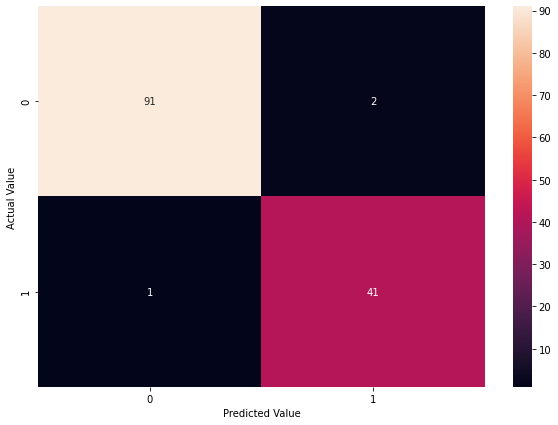

In [82]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [83]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9778



In [84]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        93
           1       0.95      0.98      0.96        42

    accuracy                           0.98       135
   macro avg       0.97      0.98      0.97       135
weighted avg       0.98      0.98      0.98       135



### Cross Validation for KNN (Optimized)

In [85]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [86]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average Accuracy of K-FOLDS:
0.9689420544337137
 
Accuracy Variance of K-FOLDS:
0.023223379758989998
 


In [87]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average F1 of K-FOLDS:
0.9689420544337137
 
F1 Variance of K-FOLDS:
0.023223379758989998
 


In [88]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_KNN)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_KNN)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_KNN)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9778
 
Classification Error: 0.0222
 
Sensitivity or Recall Score: 0.9762
 
Specificity: 0.9785
 
False Positive Rate: 0.0215
 
Precision: 0.9535
 
F1 Score: 0.9647
 


## C. SVM Regression

In [89]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

###### To Evaluate the Performance of the Support Vector Machine Model

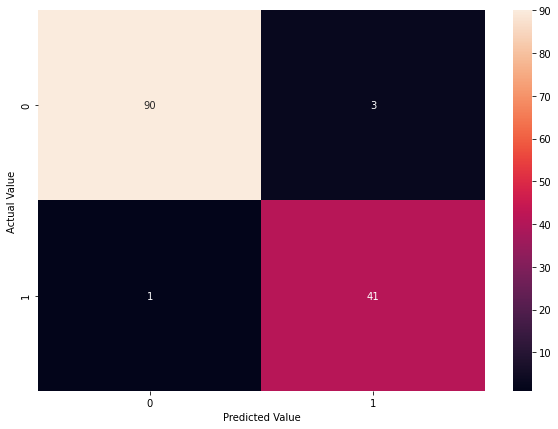

In [90]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [91]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9704



In [92]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        93
           1       0.93      0.98      0.95        42

    accuracy                           0.97       135
   macro avg       0.96      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



### Cross Validation for SVM (Default)

In [93]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [94]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average Accuracy of K-FOLDS:
0.9689420544337137
 
Accuracy Variance of K-FOLDS:
0.023223379758989998
 


In [95]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average F1 of K-FOLDS:
0.9689420544337137
 
F1 Variance of K-FOLDS:
0.023223379758989998
 


### Hold-out Validation for SVM (Default)

In [96]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_SVM)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_SVM)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_SVM)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9704
 
Classification Error: 0.0296
 
Sensitivity or Recall Score: 0.9762
 
Specificity: 0.9677
 
False Positive Rate: 0.0323
 
Precision: 0.9318
 
F1 Score: 0.9535
 


#### Applying GridSearch to find the Best Parameters for the Support Vector Machine Model

In [97]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Support Vector Machine Model
parameters = [{'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['linear'], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 5, 10], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.5, 1, 5, 10], 'degree': [2, 3, 4, 5], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.5, 1, 5, 10]}]
grid_search = GridSearchCV(estimator = support_vector_machine,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'gamma': [0.1, 0.5, 1, 5, 10], 'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [2, 3, 4, 5], 'gamma': [0.1, 0.5, 1, 5, 10],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'gamma': [0.1, 0.5, 1, 5, 10],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')


In [98]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.964464,0.021200,"{'C': 0.001, 'decision_function_shape': 'ovo',..."
1,0.964464,0.021200,"{'C': 0.001, 'decision_function_shape': 'ovr',..."
2,0.967428,0.028767,"{'C': 0.01, 'decision_function_shape': 'ovo', ..."
3,0.967428,0.028767,"{'C': 0.01, 'decision_function_shape': 'ovr', ..."
4,0.965935,0.033229,"{'C': 0.1, 'decision_function_shape': 'ovo', '..."
...,...,...,...
337,0.302063,0.071905,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}"
338,0.464969,0.065539,"{'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid'}"
339,0.650395,0.005381,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}"
340,0.650395,0.005381,"{'C': 1000, 'gamma': 5, 'kernel': 'sigmoid'}"


In [99]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9674275680421422

BEST PARAMETERS:
{'C': 0.01, 'decision_function_shape': 'ovo', 'kernel': 'linear'}


###### To Create New Support Vector Machine Model Using the Optimized Parameters


In [100]:
# To Instantiate the Model (Using the Optimized Parameters)
state_vector_machine = SVC(C=1000, decision_function_shape='ovo', gamma=0.5, kernel='poly', degree=4, random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
state_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_SVM = state_vector_machine.predict(X_test)
Y_predict_SVM


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int64)

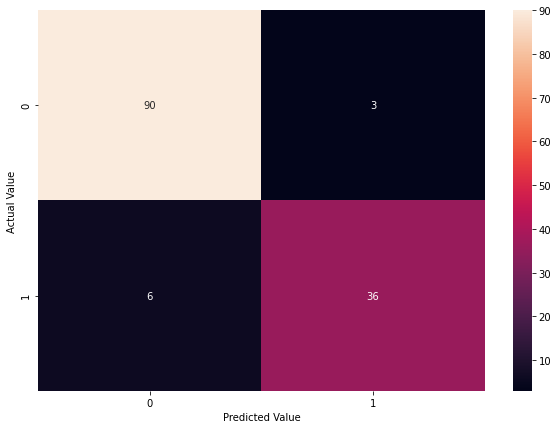

In [101]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [102]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9333



In [103]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        93
           1       0.92      0.86      0.89        42

    accuracy                           0.93       135
   macro avg       0.93      0.91      0.92       135
weighted avg       0.93      0.93      0.93       135



### Cross Validation for SVM (Optimized)

In [104]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [105]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average Accuracy of K-FOLDS:
0.9689420544337137
 
Accuracy Variance of K-FOLDS:
0.023223379758989998
 


In [106]:
# For the F1 as scoring for cross-validation 
F1 = cross_val_score(estimator=model, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.98529412 0.97058824 0.95588235 0.91176471 0.98529412 1.
 0.95522388 0.98507463 0.97014925 0.97014925]
 
Average F1 of K-FOLDS:
0.9689420544337137
 
F1 Variance of K-FOLDS:
0.023223379758989998
 


In [107]:
# To evaluate the performance of the logistic regression model using holdout
# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_SVM)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_SVM)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_SVM)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9333
 
Classification Error: 0.0667
 
Sensitivity or Recall Score: 0.8571
 
Specificity: 0.9677
 
False Positive Rate: 0.0323
 
Precision: 0.9231
 
F1 Score: 0.8889
 


In [108]:
# H. For classification report
from sklearn.metrics import classification_report
classification_report = classification_report(Y_test, Y_predict_SVM)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        93
           1       0.92      0.86      0.89        42

    accuracy                           0.93       135
   macro avg       0.93      0.91      0.92       135
weighted avg       0.93      0.93      0.93       135



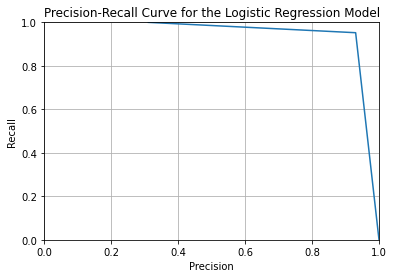

In [109]:
# I. For the Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_value, recall_value, threshold = precision_recall_curve(Y_test, Y_predict_LogReg)
plt.plot(precision_value, recall_value)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision-Recall Curve for the Logistic Regression Model')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

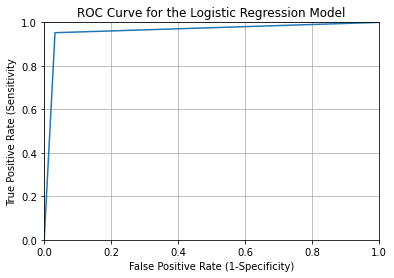

In [110]:
# J. For the ROC Curve
# FP rate and TP rate
from sklearn.metrics import roc_curve
FPR, TPR, threshold = roc_curve(Y_test, Y_predict_LogReg)
plt.plot(FPR, TPR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for the Logistic Regression Model')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity')
plt.grid(True)
plt.show()